## project oulines 

import and install Dependencies 

In [ ]:
!pip install tensorflow    opencv-python mediapipe scikit-learn matplotlib

In [ ]:
import cv2
import numpy as np 
import os 
from matplotlib import pyplot as plt 
import time 
import mediapipe as mp 

2.keypoints using mp holistic 

In [ ]:
# so media pipe holistic is a real time machine learning solution from google that comains pose estimation face landmark detection and hadtracking into one single pipeline
mp_holistic = mp.solutions.holistic # holistic model 
mp_drawing = mp.solutions.drawing_utils # drawing utilities 

In [ ]:
mp_drawing??

Type:        module
String form: <module 'mediapipe.python.solutions.drawing_utils' from 'c:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\mediapipe\\python\\solutions\\drawing_utils.py'>
File:        c:\users\asus\appdata\local\programs\python\python312\lib\site-packages\mediapipe\python\solutions\drawing_utils.py
Source:     
# Copyright 2020 The MediaPipe Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""MediaPipe solution drawing utils."""

import da

In [ ]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)# color converstion 
    image.flags.writeable = False # image is no longer writeable 
    results = model.process(image)#make prediction 
    image.flags.writeable = True #setting it back to writeable 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)#color converstion back 
    return image , results

In [ ]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [ ]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,156,121),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,130),thickness=2,circle_radius=2))

In [ ]:
cap = cv2.VideoCapture(0) # actevly accessing our webcam , oh like hey grap video device 0 aand it should be our webcam 
with mp_holistic.Holistic(min_detection_confidence = 0.5 , min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened(): # when we are still accessing our cam 

    # read the frame  
    ret , frame = cap.read()

    #make detectiongs 
    image,results = mediapipe_detection(frame,holistic)
    print(results)
    draw_styled_landmarks(image,results)

    #print results 
    cv2.imshow('openCV Feed ',image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break 
  cap.release()
  cv2.destroyAllWindows()    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
frame

array([[[175, 181, 154],
        [172, 176, 150],
        [178, 181, 156],
        ...,
        [246, 245, 225],
        [244, 243, 223],
        [242, 242, 221]],

       [[175, 181, 153],
        [175, 180, 153],
        [179, 182, 157],
        ...,
        [246, 244, 221],
        [248, 246, 222],
        [252, 250, 226]],

       [[175, 181, 152],
        [180, 185, 157],
        [179, 182, 156],
        ...,
        [250, 247, 219],
        [248, 245, 215],
        [247, 243, 212]],

       ...,

       [[ 38,  40,  31],
        [ 39,  41,  33],
        [ 42,  42,  35],
        ...,
        [ 49,  91, 135],
        [ 49,  91, 134],
        [ 49,  91, 133]],

       [[ 41,  40,  32],
        [ 42,  41,  34],
        [ 42,  40,  35],
        ...,
        [ 50,  90, 135],
        [ 49,  91, 134],
        [ 49,  91, 133]],

       [[ 44,  42,  34],
        [ 44,  42,  35],
        [ 44,  41,  37],
        ...,
        [ 50,  90, 135],
        [ 50,  91, 134],
        [ 50,  92, 135]]

In [ ]:
draw_landmarks(frame,results)

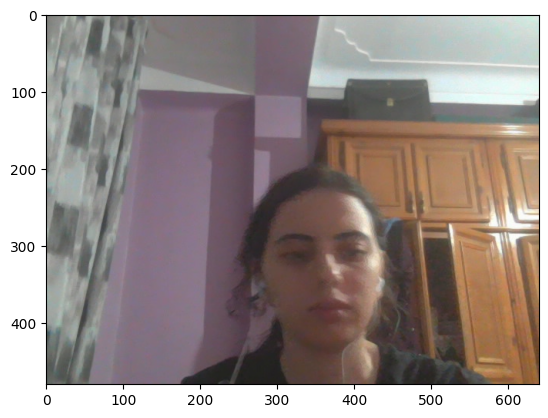

In [ ]:
plt.imshow(cv2.cvtColor(  frame , cv2.COLOR_BGR2RGB ))